In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

foldername='Results'
if os.path.exists(foldername):
    pass
else:
    os.makedirs(foldername)
X=np.array([[1,2,3],[4,5,6],[7,8,9]])
x=np.array([1,2,3,3,3,4,5,6,7,8,9,2,3,4,5,6])


[np.int64(1),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(3),
 np.int64(4),
 np.int64(4),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [ ]:
# Define paramters and monte carlo simulaotr with pricing fucntion fpr asian options 

s0=100
k=np.linspace(80,120,5)
r=0.05
sigma=0.3
t=np.linspace(1,2,5)
nofsteps=100
noofpaths=10000
Data = pd.DataFrame(columns = range(len(t)), index = range(len(k)))
Data.index.name='Strikes'
Data.columns.name='Maturities'

def monte_carlo_asian(s0,k,r,sigma,t,nofsteps,noofpaths,type):
    Results={}
    price = 0
    payoff = 0
    type=type.lower()
    dt=t/nofsteps
    stock=np.zeros((noofpaths,nofsteps+1))
    stock[:,0]=s0
    z=np.random.normal(0,1,(noofpaths,nofsteps))
    time=np.zeros(nofsteps+1)
    for i in range(nofsteps):
        z[:,i]=(z[:,i]-np.mean(z[:,i]))/np.std(z[:,i],ddof=1)
        stock[:,i+1]=stock[:,i] + stock[:,i]*r*dt + stock[:,i]*sigma*z[:,i]*np.sqrt(dt)  
        time[i+1]=time[i]+dt
    Results['stock']=stock
    Results['time']=time
    Results['terminal']=stock[:,-1]
    Results['average']=np.mean(stock,axis=1)
    
    if type=='call':
        price = np.exp(-r*t)*np.mean(np.maximum(Results['average']-k,0))
        payoff = np.maximum(Results['average']-k,0)
    if type=='put':
        price = np.exp(-r*t)*np.mean(np.maximum(k-Results['average'],0))
        payoff = np.maximum(k-Results['average'],0)
    Results['price']=price
    Results['payoff']=payoff
    return Results



In [ ]:
# Generatig the data for the given set fo strikes and maturities and getting call prices
for i in range(len(k)):
    for j in range(len(t)):
        result=monte_carlo_asian(s0,k[i],r,sigma,t[j],nofsteps,noofpaths,'call')
        Data.iloc[i,j]=result['price']  
Data.to_csv('Results/Asian_call_prices.csv')

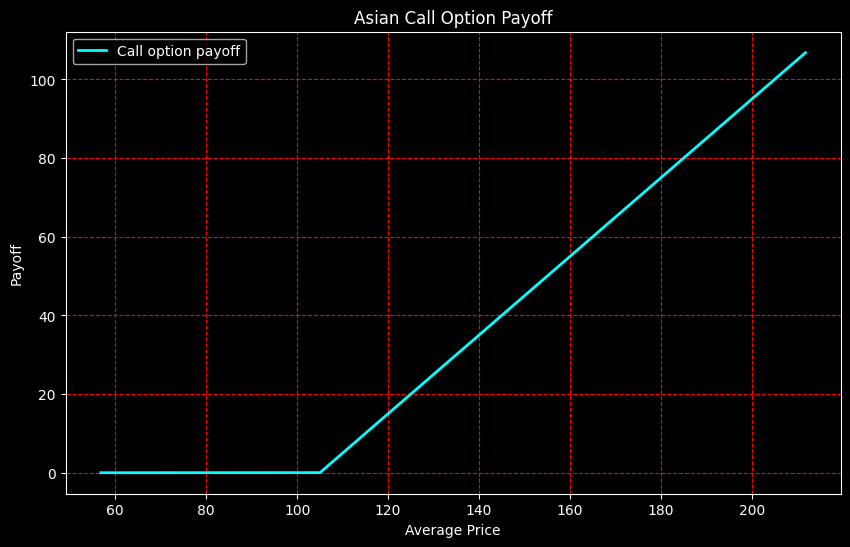

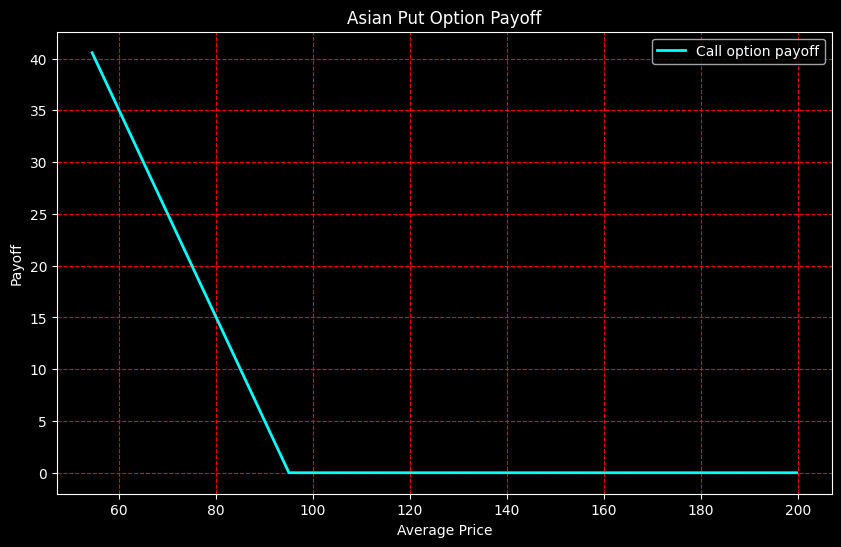

In [68]:
# plots for the given set of strikes and maturities
call = monte_carlo_asian(s0,105,r,sigma,1,nofsteps,noofpaths,'call')
put = monte_carlo_asian(s0,95,r,sigma,1,nofsteps,noofpaths,'put')

# plotting the payoff for the asian optin for call and puts for the given set of strikes and matrutities 
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(np.unique(call['average']),np.sort(call['payoff']),color='cyan',label='Call option payoff',linewidth=2)
plt.xlabel('Average Price')
plt.ylabel('Payoff')
plt.title('Asian Call Option Payoff')
plt.legend()
plt.grid(color='red',linestyle='--')


plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(np.unique(put['average']) , np.maximum(95-np.unique(put['average']),0),color='cyan',label='Call option payoff',linewidth=2)
plt.xlabel('Average Price')
plt.ylabel('Payoff')
plt.title('Asian Put Option Payoff')
plt.legend()
plt.grid(color='red',linestyle='--')

